# Lecture 9 - Choosing an appropriate visualization & EDA

## Announcements (5 mins)

- Schedule changes for next week
    - Labs/Office hours on Wed/Thurs/Fri cancelled next week
    - Test 4 window will be moved to Sunday 6PM - Tuesday 6 PM
- Material for next two weeks is shuffled a bit (see Canvas announcement)
- Prepare for next week by requesting your free Tableau for Students License
- Heads up: Approaching “end of Term crunch”! Stay on top of your deadlines!

## Part 1: Choosing an appropriate data visualization (15 mins)

See Lecture Slides below...

## Part 2: Motivating the need for EDA

`bullet_data.csv` is available here: https://github.com/firasm/bits/raw/master/bullet_data.csv

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white",
              font_scale=1.3)

In [31]:
df = pd.read_csv('https://github.com/firasm/bits/raw/master/bullet_data.csv')
df.head()

,x,y,bullet,zone
0,0,0,0.0,OutsidePlane
1,0,1,0.0,OutsidePlane
2,0,2,0.0,OutsidePlane
3,0,3,0.0,OutsidePlane
4,0,4,0.0,OutsidePlane


In [32]:
# Use our standard tool first:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,87500.0,124.500000,72.168619,0.0,62.0,124.5,187.0,249.0
y,87500.0,174.500000,101.036462,0.0,87.0,174.5,262.0,349.0
bullet,68526.0,0.008741,0.093086,0.0,0.0,0.0,0.0,1.0


mmm... well that's not super helpful. Let's try and figure out some more info manually

In [33]:
print("The zones are: {0}".format(sorted(set(df['zone']))),"\n")

print("Columns are: {0}".format(list(df.columns)),"\n")

print("Values for 'bullet' column is either 1 or NA","\n")

The zones are: ['A', 'B', 'C', 'D', 'E', 'OutsidePlane', 'Unknown'] 

Columns are: ['x', 'y', 'bullet', 'zone'] 

Values for 'bullet' column is either 1 or NA 



Let's wrangle the data a bit to try and see what's going on:

In [41]:
# First, only consider the bullet 'hits':

hits_df = df[df['bullet']==1]
hits_df.head()

# Then, let's groupby the "zone" and look at the resulting dataframe
# I have "reset" the index of the groupby object so we can have a continuous index

summary = hits_df.groupby('zone').count().reset_index()
summary

,zone,x,y,bullet
0,A,83,83,83
1,B,259,259,259
2,C,83,83,83
3,D,47,47,47
4,E,111,111,111
5,Unknown,16,16,16


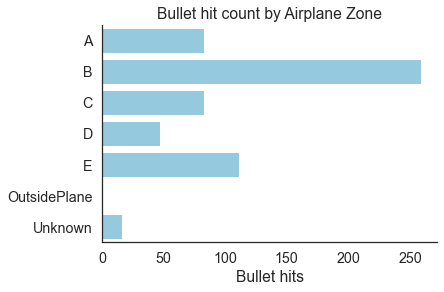

In [42]:
# Now let's visualize the table above:

sns.countplot(data=hits_df, y='zone', order = sorted(set(df['zone'])),color='skyblue')
plt.ylabel('')
plt.title('Bullet hit count by Airplane Zone')
plt.xlabel('Bullet hits')
sns.despine()

## Part 3: Judicious use of Colours

See Lecture Slides below...

## Lecture Slides

<iframe src="../../Lecture9B_EDA.pdf" width="100%" height="800px" frameBorder="0"> </iframe>